In [1]:
import pandas as pd
import numpy as np

In [2]:
# import libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("train.csv")

In [129]:
test_df = pd.read_csv("test.csv")

In [119]:
test_df.head()

,ID,Person A,Person B,Years of Knowing,Interaction Type,Interaction Duration,Moon Phase During Interaction
0,1,Benjamin,Mary,3.38,Over a Meal,15.07,Third Quarter
1,2,Paul,Heather,0.00,In Passing,6.88,Third Quarter
2,3,Noah,Julie,3.66,At Work,10.44,First Quarter
3,4,Philip,Samantha,5.81,Class,11.33,First Quarter
4,5,Ethan,Marilyn,5.30,Over a Meal,5.54,Third Quarter


In [120]:
test_df.drop("ID",axis=1,inplace=True)

In [122]:
categorical = ['Person A', 'Person B', 'Interaction Type', 'Moon Phase During Interaction']
for feature in categorical:
        le = preprocessing.LabelEncoder()
        test_df[feature] = le.fit_transform(test_df[feature])
        


In [123]:
scaler = StandardScaler()

test_df = pd.DataFrame(scaler.fit_transform(test_df), columns = test_df.columns)

In [124]:
test_df.head()

,Person A,Person B,Years of Knowing,Interaction Type,Interaction Duration,Moon Phase During Interaction
0,-1.402912,0.809023,0.024254,0.292028,1.022585,-0.224992
1,0.771697,-0.331448,-1.266340,-0.294441,-0.645980,-0.224992
2,0.702662,0.152388,0.131167,-1.467378,0.079306,-1.534555
3,0.840732,1.292859,0.952107,-0.880909,0.260627,-1.534555
4,-0.747077,0.739904,0.757373,0.292028,-0.918981,-0.224992


In [5]:
df.shape

(54697, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54697 entries, 0 to 54696
Data columns (total 8 columns):
ID                               54697 non-null int64
Person A                         54697 non-null object
Person B                         54697 non-null object
Years of Knowing                 54697 non-null float64
Interaction Type                 54697 non-null object
Interaction Duration             54697 non-null float64
Moon Phase During Interaction    54697 non-null object
Friends                          54697 non-null int64
dtypes: float64(2), int64(2), object(4)
memory usage: 3.3+ MB


In [7]:
#this means that there are no null values

In [8]:
df.describe()

,ID,Years of Knowing,Interaction Duration,Friends
count,54697.000000,54697.000000,54697.000000,54697.000000
mean,27349.000000,3.316479,10.050735,0.485804
std,15789.808174,2.618973,4.908453,0.499803
min,1.000000,0.000000,0.000000,0.000000
25%,13675.000000,1.060000,6.630000,0.000000
50%,27349.000000,3.060000,9.990000,0.000000
75%,41023.000000,5.130000,13.390000,1.000000
max,54697.000000,15.260000,30.860000,1.000000


In [9]:
df["ID"] # it is of no use as it's unique for every entry and has no significance

0            1
1            2
2            3
3            4
4            5
         ...  
54692    54693
54693    54694
54694    54695
54695    54696
54696    54697
Name: ID, Length: 54697, dtype: int64

In [10]:
df.drop("ID",axis=1,inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54697 entries, 0 to 54696
Data columns (total 7 columns):
Person A                         54697 non-null object
Person B                         54697 non-null object
Years of Knowing                 54697 non-null float64
Interaction Type                 54697 non-null object
Interaction Duration             54697 non-null float64
Moon Phase During Interaction    54697 non-null object
Friends                          54697 non-null int64
dtypes: float64(2), int64(1), object(4)
memory usage: 2.9+ MB


In [12]:
len(df['Person A'].unique())  # there are 100 unique names in Person A column

100

In [13]:
df['Person A'].value_counts()   # the heighest frequency is 627 for a particular entry
                                # the lowest frequency is 472 for a particular entry

William    627
Zachary    612
Richard    607
Stephen    600
Juan       598
          ... 
Kenneth    487
Douglas    486
Mark       483
Ryan       476
Kevin      472
Name: Person A, Length: 100, dtype: int64

In [14]:
len(df['Person B'].unique())  # there are 100 unique names in Person B column

100

In [15]:
df['Person B'].value_counts()  # the heighest frequency is 617 for a particular entry
                                # the lowest frequency is 483 for a particular entry

Natalie      617
Catherine    612
Theresa      604
Madison      597
Lisa         591
            ... 
Emily        497
Carol        496
Margaret     495
Nancy        490
Doris        483
Name: Person B, Length: 100, dtype: int64

In [16]:
df['Years of Knowing'].describe()   # here the max years of knowing is 15.26
                                    # and min years of knowing is 0

count    54697.000000
mean         3.316479
std          2.618973
min          0.000000
25%          1.060000
50%          3.060000
75%          5.130000
max         15.260000
Name: Years of Knowing, dtype: float64

In [17]:
len(df['Interaction Type'].unique())   # 6 unique values in Interaction Type

6

In [18]:
df['Interaction Type'].unique()     # namely ------
                                    #1 'Social_Media',
                                    #2 'In Passing',
                                    #3 'Over a Meal',
                                    #4 'Party',
                                    #5 'Class',
                                    #6 'At Work'

array(['Social_Media', 'In Passing', 'Over a Meal', 'Party', 'Class',
       'At Work'], dtype=object)

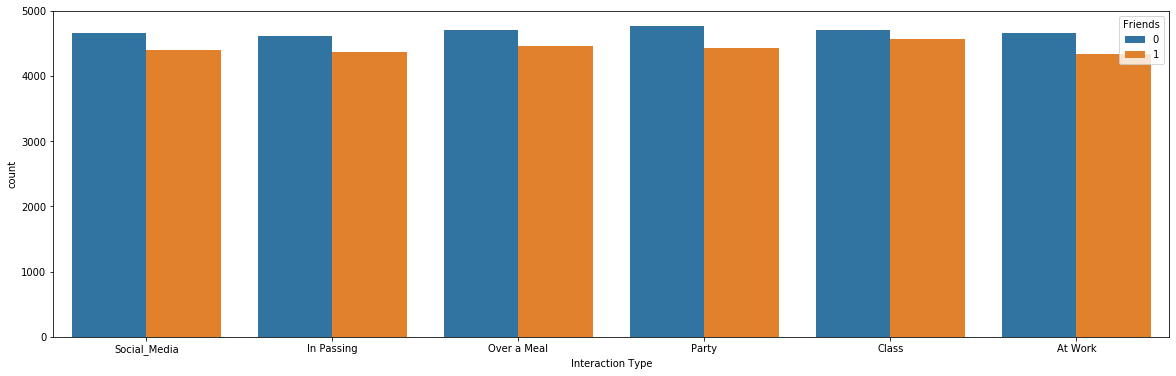

In [19]:
import seaborn as sns
plt.figure(figsize=(20,6))
sns.countplot(df['Interaction Type'],hue=df['Friends'])

In [20]:
df['Interaction Duration'].describe()   # here the max Interaction Duration is 30.86
                                        # and min Interaction Duration is 0

count    54697.000000
mean        10.050735
std          4.908453
min          0.000000
25%          6.630000
50%          9.990000
75%         13.390000
max         30.860000
Name: Interaction Duration, dtype: float64

In [21]:
len(df['Moon Phase During Interaction'].unique())  # 8 unique values in Moon Phase During Interaction

8

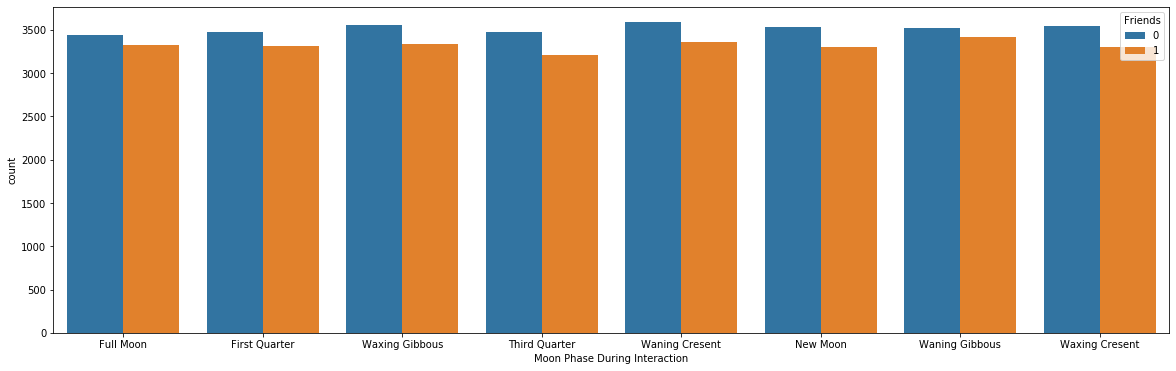

In [22]:
plt.figure(figsize=(20,6))
sns.countplot(df['Moon Phase During Interaction'],hue=df['Friends'])
plt.show()

In [23]:
df['Moon Phase During Interaction'].unique()
# namely          

array(['Full Moon', 'First Quarter', 'Waxing Gibbous', 'Third Quarter',
       'Waning Cresent', 'New Moon', 'Waning Gibbous', 'Waxing Cresent'],
      dtype=object)

In [24]:
df['Friends'].unique()   # the target values are only 1 or 0

array([1, 0])

In [25]:
df['Friends'].value_counts()

0    28125
1    26572
Name: Friends, dtype: int64

# Setting feature vector and target variable

In [26]:
X= df.drop('Friends',axis=1)

In [27]:
y = df['Friends']

In [28]:
X.head(4)

,Person A,Person B,Years of Knowing,Interaction Type,Interaction Duration,Moon Phase During Interaction
0,Paul,Deborah,4.72,Social_Media,0.00,Full Moon
1,Brian,Emily,9.67,In Passing,6.07,First Quarter
2,Kyle,Madison,1.64,In Passing,5.38,Waxing Gibbous
3,Daniel,Teresa,0.00,Over a Meal,15.72,Waxing Gibbous


# Split data into separate training and test set

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Feature Engineering

Encode categorical variables

In [30]:
from sklearn import preprocessing

categorical = ['Person A', 'Person B', 'Interaction Type', 'Moon Phase During Interaction']
for feature in categorical:
        le = preprocessing.LabelEncoder()
        X_train[feature] = le.fit_transform(X_train[feature])
        X_test[feature] = le.transform(X_test[feature])


# Feature Scaling

In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)

X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

In [32]:
X_train.head()

,Person A,Person B,Years of Knowing,Interaction Type,Interaction Duration,Moon Phase During Interaction
0,-0.924633,-1.265314,-0.883555,0.884161,-1.100229,-1.533539
1,-0.025878,-1.680134,-1.166564,-0.290415,0.205516,0.208398
2,-1.685117,1.119897,1.246665,1.471449,-0.346836,-1.533539
3,1.114848,1.292738,1.774440,-1.464992,0.629933,-1.098054
4,-0.820930,0.670509,-0.680859,-0.290415,-1.220040,0.643882


In [33]:
X_test.head()

,Person A,Person B,Years of Knowing,Interaction Type,Interaction Duration,Moon Phase During Interaction
0,-0.440688,0.186553,0.114627,-0.290415,1.937708,0.643882
1,-1.581414,-0.850495,-1.269824,-0.290415,-1.441387,1.079367
2,1.080280,0.324826,-0.780294,-0.290415,-0.231086,0.643882
3,-1.132037,1.603853,0.531493,1.471449,0.091796,-0.227086
4,-0.233283,0.739646,-0.684683,0.884161,0.394371,0.643882


# Logistic Regression model with all features

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print('Logistic Regression accuracy score with all 6 the features: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Logistic Regression accuracy score with all 6 the features: 0.5079


In [35]:
logreg.score(X_train, y_train)


0.5119231070598376

# PCA

In [36]:
from sklearn.decomposition import PCA
pca = PCA()
temp_X_train= X_train
temp_X_train = pca.fit_transform(temp_X_train)
pca.explained_variance_ratio_

array([0.17147762, 0.16794455, 0.16676051, 0.16604698, 0.16475905,
       0.16301129])

In [35]:
# As we can see every feature adds significant variance hence
# droping the variables in this case is not a good idea! Therefore we should use every 
# feature present to build our model as done previously.

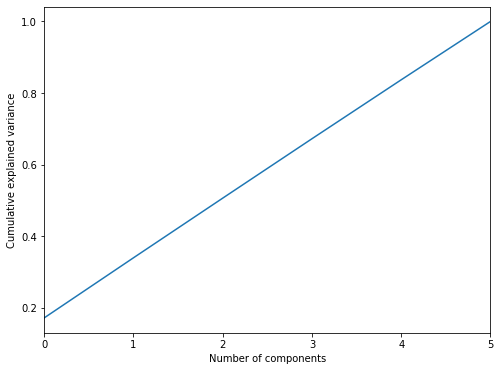

In [37]:
plt.figure(figsize=(8,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,5,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()
# ploting cumulative explained variance ratio with number 
# of components to show how variance ratio varies with number of components.

# Decision Tree Model.

In [38]:
from sklearn.tree import DecisionTreeClassifier

# max_features =6 (from above cum_sum chart)
# min_samples_leaf=100 controling the branches by setting the limits (Pruning)

In [39]:

clf = DecisionTreeClassifier(max_features=6,min_samples_leaf=100,random_state=10)
clf.fit(X_train, y_train)
# y_pred = logreg.predict(X_test)
y_pred = clf.predict(X_test)

print('D-Tree accuracy score with all 6 the features: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

D-Tree accuracy score with all 6 the features: 0.6148


In [40]:
clf.score(X_train, y_train)


0.651735576044088

# Xgboost

In [41]:
from xgboost import XGBClassifier

clf= XGBClassifier()

clf.fit(X_train, y_train)
# y_pred = logreg.predict(X_test)
y_pred = clf.predict(X_test)
print('XGboost accuracy score with all 6 the features: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

XGboost accuracy score with all 6 the features: 0.7840


In [42]:
clf.score(X_train, y_train)


0.853553425444668

# catboost

In [43]:
from catboost import CatBoostClassifier

clf= CatBoostClassifier(learning_rate=0.05)

clf.fit(X_train, y_train)
# y_pred = logreg.predict(X_test)
y_pred = clf.predict(X_test)
print('catboost accuracy score with all 6 the features: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

0:	learn: 0.6928372	total: 123ms	remaining: 2m 3s
1:	learn: 0.6925117	total: 170ms	remaining: 1m 24s
2:	learn: 0.6921803	total: 188ms	remaining: 1m 2s
3:	learn: 0.6919754	total: 199ms	remaining: 49.7s
4:	learn: 0.6915610	total: 209ms	remaining: 41.7s
5:	learn: 0.6912786	total: 220ms	remaining: 36.5s
6:	learn: 0.6910207	total: 230ms	remaining: 32.6s
7:	learn: 0.6906656	total: 240ms	remaining: 29.8s
8:	learn: 0.6904171	total: 251ms	remaining: 27.7s
9:	learn: 0.6900788	total: 262ms	remaining: 25.9s
10:	learn: 0.6897936	total: 270ms	remaining: 24.3s
11:	learn: 0.6895779	total: 281ms	remaining: 23.1s
12:	learn: 0.6893448	total: 289ms	remaining: 22s
13:	learn: 0.6890219	total: 300ms	remaining: 21.1s
14:	learn: 0.6888949	total: 311ms	remaining: 20.4s
15:	learn: 0.6886356	total: 322ms	remaining: 19.8s
16:	learn: 0.6883673	total: 337ms	remaining: 19.5s
17:	learn: 0.6880777	total: 360ms	remaining: 19.7s
18:	learn: 0.6877826	total: 372ms	remaining: 19.2s
19:	learn: 0.6876236	total: 382ms	remainin

162:	learn: 0.6652849	total: 2.18s	remaining: 11.2s
163:	learn: 0.6652028	total: 2.2s	remaining: 11.2s
164:	learn: 0.6650341	total: 2.21s	remaining: 11.2s
165:	learn: 0.6648219	total: 2.23s	remaining: 11.2s
166:	learn: 0.6646566	total: 2.24s	remaining: 11.2s
167:	learn: 0.6645656	total: 2.25s	remaining: 11.2s
168:	learn: 0.6643936	total: 2.26s	remaining: 11.1s
169:	learn: 0.6641966	total: 2.27s	remaining: 11.1s
170:	learn: 0.6640647	total: 2.28s	remaining: 11.1s
171:	learn: 0.6639356	total: 2.29s	remaining: 11s
172:	learn: 0.6638809	total: 2.3s	remaining: 11s
173:	learn: 0.6635907	total: 2.31s	remaining: 11s
174:	learn: 0.6635282	total: 2.32s	remaining: 11s
175:	learn: 0.6634142	total: 2.33s	remaining: 10.9s
176:	learn: 0.6633789	total: 2.34s	remaining: 10.9s
177:	learn: 0.6632207	total: 2.35s	remaining: 10.9s
178:	learn: 0.6631598	total: 2.37s	remaining: 10.8s
179:	learn: 0.6630425	total: 2.38s	remaining: 10.8s
180:	learn: 0.6629002	total: 2.39s	remaining: 10.8s
181:	learn: 0.6627680	

324:	learn: 0.6352588	total: 4.29s	remaining: 8.9s
325:	learn: 0.6351100	total: 4.3s	remaining: 8.9s
326:	learn: 0.6349066	total: 4.32s	remaining: 8.89s
327:	learn: 0.6346536	total: 4.33s	remaining: 8.88s
328:	learn: 0.6344779	total: 4.35s	remaining: 8.87s
329:	learn: 0.6343835	total: 4.36s	remaining: 8.86s
330:	learn: 0.6342047	total: 4.37s	remaining: 8.84s
331:	learn: 0.6339982	total: 4.39s	remaining: 8.83s
332:	learn: 0.6336538	total: 4.4s	remaining: 8.81s
333:	learn: 0.6333798	total: 4.41s	remaining: 8.79s
334:	learn: 0.6332326	total: 4.42s	remaining: 8.77s
335:	learn: 0.6330159	total: 4.43s	remaining: 8.75s
336:	learn: 0.6327788	total: 4.44s	remaining: 8.74s
337:	learn: 0.6326043	total: 4.45s	remaining: 8.72s
338:	learn: 0.6323760	total: 4.46s	remaining: 8.7s
339:	learn: 0.6322960	total: 4.47s	remaining: 8.68s
340:	learn: 0.6321675	total: 4.48s	remaining: 8.66s
341:	learn: 0.6319306	total: 4.5s	remaining: 8.65s
342:	learn: 0.6317100	total: 4.51s	remaining: 8.64s
343:	learn: 0.6314

484:	learn: 0.6073419	total: 6.16s	remaining: 6.54s
485:	learn: 0.6070832	total: 6.18s	remaining: 6.54s
486:	learn: 0.6068977	total: 6.2s	remaining: 6.53s
487:	learn: 0.6068040	total: 6.21s	remaining: 6.51s
488:	learn: 0.6066197	total: 6.22s	remaining: 6.5s
489:	learn: 0.6064926	total: 6.23s	remaining: 6.48s
490:	learn: 0.6062916	total: 6.24s	remaining: 6.47s
491:	learn: 0.6060655	total: 6.25s	remaining: 6.45s
492:	learn: 0.6058242	total: 6.26s	remaining: 6.44s
493:	learn: 0.6056801	total: 6.27s	remaining: 6.42s
494:	learn: 0.6055243	total: 6.29s	remaining: 6.41s
495:	learn: 0.6053461	total: 6.3s	remaining: 6.4s
496:	learn: 0.6051843	total: 6.31s	remaining: 6.38s
497:	learn: 0.6049739	total: 6.32s	remaining: 6.37s
498:	learn: 0.6047760	total: 6.34s	remaining: 6.36s
499:	learn: 0.6046021	total: 6.36s	remaining: 6.36s
500:	learn: 0.6043886	total: 6.37s	remaining: 6.34s
501:	learn: 0.6042410	total: 6.39s	remaining: 6.34s
502:	learn: 0.6040147	total: 6.4s	remaining: 6.33s
503:	learn: 0.603

643:	learn: 0.5825321	total: 8.05s	remaining: 4.45s
644:	learn: 0.5823747	total: 8.06s	remaining: 4.44s
645:	learn: 0.5821378	total: 8.08s	remaining: 4.43s
646:	learn: 0.5820241	total: 8.09s	remaining: 4.41s
647:	learn: 0.5818984	total: 8.1s	remaining: 4.4s
648:	learn: 0.5817316	total: 8.11s	remaining: 4.39s
649:	learn: 0.5816573	total: 8.12s	remaining: 4.37s
650:	learn: 0.5815097	total: 8.13s	remaining: 4.36s
651:	learn: 0.5813499	total: 8.14s	remaining: 4.34s
652:	learn: 0.5811569	total: 8.15s	remaining: 4.33s
653:	learn: 0.5810489	total: 8.16s	remaining: 4.32s
654:	learn: 0.5809151	total: 8.17s	remaining: 4.3s
655:	learn: 0.5807500	total: 8.19s	remaining: 4.29s
656:	learn: 0.5806220	total: 8.2s	remaining: 4.28s
657:	learn: 0.5804445	total: 8.21s	remaining: 4.26s
658:	learn: 0.5804071	total: 8.22s	remaining: 4.25s
659:	learn: 0.5802427	total: 8.23s	remaining: 4.24s
660:	learn: 0.5800249	total: 8.24s	remaining: 4.22s
661:	learn: 0.5798534	total: 8.25s	remaining: 4.21s
662:	learn: 0.57

804:	learn: 0.5609102	total: 9.92s	remaining: 2.4s
805:	learn: 0.5608652	total: 9.93s	remaining: 2.39s
806:	learn: 0.5607203	total: 9.95s	remaining: 2.38s
807:	learn: 0.5605710	total: 9.96s	remaining: 2.37s
808:	learn: 0.5604145	total: 9.97s	remaining: 2.35s
809:	learn: 0.5602648	total: 9.98s	remaining: 2.34s
810:	learn: 0.5601831	total: 10s	remaining: 2.33s
811:	learn: 0.5600872	total: 10s	remaining: 2.32s
812:	learn: 0.5599281	total: 10s	remaining: 2.3s
813:	learn: 0.5596903	total: 10s	remaining: 2.29s
814:	learn: 0.5595914	total: 10s	remaining: 2.28s
815:	learn: 0.5594415	total: 10.1s	remaining: 2.27s
816:	learn: 0.5593861	total: 10.1s	remaining: 2.25s
817:	learn: 0.5592795	total: 10.1s	remaining: 2.24s
818:	learn: 0.5590711	total: 10.1s	remaining: 2.23s
819:	learn: 0.5588477	total: 10.1s	remaining: 2.21s
820:	learn: 0.5587282	total: 10.1s	remaining: 2.2s
821:	learn: 0.5585972	total: 10.1s	remaining: 2.19s
822:	learn: 0.5584888	total: 10.1s	remaining: 2.18s
823:	learn: 0.5583763	tot

973:	learn: 0.5405107	total: 12s	remaining: 321ms
974:	learn: 0.5403011	total: 12s	remaining: 309ms
975:	learn: 0.5401172	total: 12.1s	remaining: 296ms
976:	learn: 0.5399503	total: 12.1s	remaining: 284ms
977:	learn: 0.5398420	total: 12.1s	remaining: 272ms
978:	learn: 0.5396847	total: 12.1s	remaining: 259ms
979:	learn: 0.5395647	total: 12.1s	remaining: 247ms
980:	learn: 0.5393359	total: 12.1s	remaining: 234ms
981:	learn: 0.5391889	total: 12.1s	remaining: 222ms
982:	learn: 0.5390780	total: 12.1s	remaining: 210ms
983:	learn: 0.5389924	total: 12.2s	remaining: 198ms
984:	learn: 0.5389222	total: 12.2s	remaining: 186ms
985:	learn: 0.5388318	total: 12.2s	remaining: 173ms
986:	learn: 0.5386740	total: 12.2s	remaining: 161ms
987:	learn: 0.5386365	total: 12.2s	remaining: 149ms
988:	learn: 0.5385096	total: 12.2s	remaining: 136ms
989:	learn: 0.5384267	total: 12.3s	remaining: 124ms
990:	learn: 0.5383359	total: 12.3s	remaining: 111ms
991:	learn: 0.5382557	total: 12.3s	remaining: 99ms
992:	learn: 0.538

In [44]:
clf.score(X_train, y_train)


0.8052602711102985

In [53]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier

In [54]:
clf= RandomForestClassifier()

clf.fit(X_train, y_train)
# y_pred = logreg.predict(X_test)
y_pred = clf.predict(X_test)

print('catboost accuracy score with all 6 the features: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
clf.score(X_train, y_train)



catboost accuracy score with all 6 the features: 0.8459


1.0

In [57]:
clf= GradientBoostingClassifier()

clf.fit(X_train, y_train)
# y_pred = logreg.predict(X_test)
y_pred = clf.predict(X_test)

print('GradientBoostingClassifier accuracy score with all 6 the features: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
clf.score(X_train, y_train)

GradientBoostingClassifier accuracy score with all 6 the features: 0.5742


0.5993679316739363

In [58]:
clf= AdaBoostClassifier()

clf.fit(X_train, y_train)
# y_pred = logreg.predict(X_test)
y_pred = clf.predict(X_test)

print('AdaBoostClassifier accuracy score with all 6 the features: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
clf.score(X_train, y_train)

AdaBoostClassifier accuracy score with all 6 the features: 0.5258


0.5353775432914566

In [59]:
# SVC
from sklearn.svm import SVC

clf= SVC()

clf.fit(X_train, y_train)
# y_pred = logreg.predict(X_test)
y_pred = clf.predict(X_test)

print('SVC accuracy score with all 6 the features: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
clf.score(X_train, y_train)

SVC accuracy score with all 6 the features: 0.5236


0.5459033092172277

In [113]:
# BaggingClassifier
from sklearn.ensemble import BaggingClassifier
clf= BaggingClassifier( base_estimator=None,
    n_estimators=15,
    max_samples=1.0,
    max_features=1.0,
    bootstrap=True,
    bootstrap_features=False,
    oob_score=False,
    warm_start=False,
    n_jobs=None,
    random_state=None,
    verbose=0,)

clf.fit(X_train, y_train)
# y_pred = logreg.predict(X_test)
y_pred = clf.predict(X_test)

print('BaggingClassifier accuracy score with all 6 the features: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
clf.score(X_train, y_train)

BaggingClassifier accuracy score with all 6 the features: 0.9640


0.9997649332671664

In [127]:
result = clf.predict(test_df)


In [131]:
result_data=test_df['ID']

In [133]:
type(result_data)

pandas.core.series.Series

In [137]:

result_data_df = result_data.to_frame()

In [138]:
type(result_data_df)

pandas.core.frame.DataFrame

In [140]:
result_data_df['Friends']=result

In [141]:
result_data_df

,ID,Friends
0,1,1
1,2,0
2,3,0
3,4,1
4,5,0
...,...,...
54692,54693,1
54693,54694,1
54694,54695,0
54695,54696,0


In [142]:
result_data_df.to_csv('submit.csv') 

In [61]:
# KNeighborsClassifier/
from sklearn.neighbors import KNeighborsClassifier
clf= KNeighborsClassifier()

clf.fit(X_train, y_train)
# y_pred = logreg.predict(X_test)
y_pred = clf.predict(X_test)

print('KNeighborsClassifier accuracy score with all 6 the features: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
clf.score(X_train, y_train)

SVC accuracy score with all 6 the features: 0.5214


0.699480241335179

In [64]:
# RidgeClassifier
from sklearn.linear_model import RidgeClassifier
clf= RidgeClassifier()

clf.fit(X_train, y_train)
# y_pred = logreg.predict(X_test)
y_pred = clf.predict(X_test)

print('RidgeClassifier accuracy score with all 6 the features: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
clf.score(X_train, y_train)

RidgeClassifier accuracy score with all 6 the features: 0.5079


0.5119231070598376

In [65]:
# GaussianNB
from sklearn.naive_bayes import GaussianNB
clf= RidgeClassifier()

clf.fit(X_train, y_train)
# y_pred = logreg.predict(X_test)
y_pred = clf.predict(X_test)

print('GaussianNB accuracy score with all 6 the features: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
clf.score(X_train, y_train)

GaussianNB accuracy score with all 6 the features: 0.5079


0.5119231070598376

In [80]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

clf= HistGradientBoostingClassifier()

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print('GaussianNB accuracy score with all 6 the features: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
clf.score(X_train, y_train)

GaussianNB accuracy score with all 6 the features: 0.7289


0.7794551675503435

In [82]:
from lightgbm import LGBMClassifier

clf= LGBMClassifier()

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print('LGBMClassifier accuracy score with all 6 the features: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
clf.score(X_train, y_train)

LGBMClassifier accuracy score with all 6 the features: 0.7244


0.7742314623762635

In [69]:
from sklearn.ensemble import VotingClassifier

In [70]:
x_clf=XGBClassifier() #0.7840

r_clf= RandomForestClassifier() #0.8459

b_clf= BaggingClassifier() #0.9564

In [77]:
voting_clf = VotingClassifier( estimators=[('XGBClassifier', x_clf), ('RandomForestClassifier', r_clf),('BaggingClassifier', b_clf)], voting='soft' )
# voting_clf = VotingClassifier( estimators=[x_clf,r_clf, b_clf], voting='hard' )


voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('XGBClassifier',
                              XGBClassifier(base_score=None, booster=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, gamma=None,
                                            gpu_id=None, importance_type='gain',
                                            interaction_constraints=None,
                                            learning_rate=None,
                                            max_delta_step=None, max_depth=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_est...
                                                     n_jobs=None,
                                                     oob_score=False,
                        

In [78]:
y_pred = voting_clf.predict(X_test)

print('GaussianNB accuracy score with all 6 the features: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
clf.score(X_train, y_train)

GaussianNB accuracy score with all 6 the features: 0.9442


0.5119231070598376